In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
%matplotlib inline
data = pd.read_csv("Downloads/Churn_Modelling.csv")
df

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

In [10]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [11]:
df.shape

(10000, 14)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Visualizing the Analysis

# Univariate Analysis

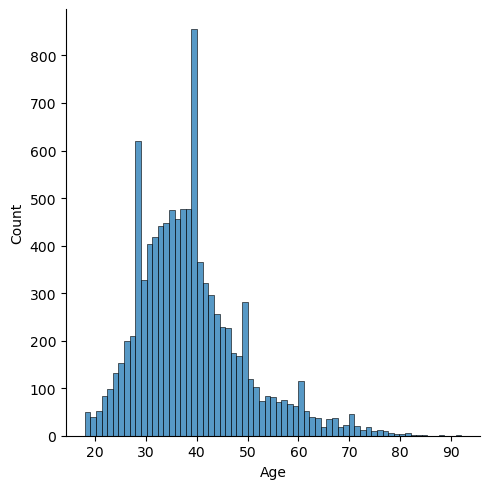

In [14]:
sns.displot(df.Age)

In [ ]:
Bi-Variate Analysis

<AxesSubplot:>

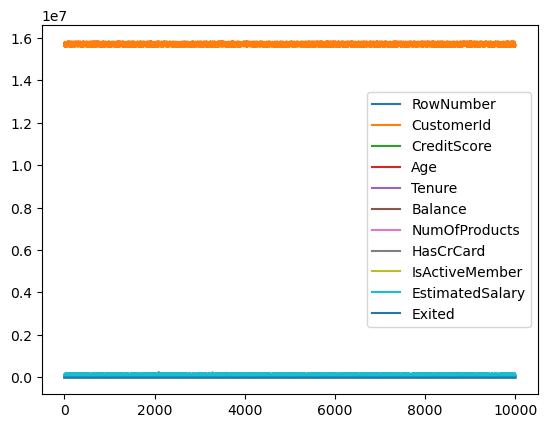

In [16]:
df.plot.line()

In [ ]:
Multi-Variate Analysis

C:\Users\ELCOT\OneDrive\Documents\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

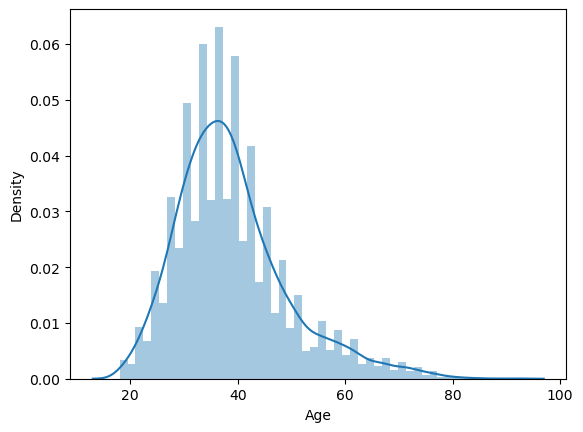

In [21]:
sns.distplot(data['Age'])

# Perform Sescriptive Statistics on Dataset

In [22]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

# Handle the Missing Values

In [25]:
data = pd.read_csv("Downloads/Churn_Modelling.csv")
pd.isnull(data["Age"])

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Age, Length: 10000, dtype: bool

# Find the Outliers and Replace the Outliers

In [27]:
pd.get_dummies(df, columns=["Gender", "Tenure"], prefix=["Tenure", "Gender"]).head()

RowNumber  CustomerId   Surname  CreditScore Geography  Age    Balance  \
0          1    15634602  Hargrave          619    France   42       0.00   
1          2    15647311      Hill          608     Spain   41   83807.86   
2          3    15619304      Onio          502    France   42  159660.80   
3          4    15701354      Boni          699    France   39       0.00   
4          5    15737888  Mitchell          850     Spain   43  125510.82   

   NumOfProducts  HasCrCard  IsActiveMember  ...  Gender_1  Gender_2  \
0              1          1               1  ...         0         1   
1              1          0               1  ...         1         0   
2              3          1               0  ...         0         0   
3              2          0               0  ...         1         0   
4              1          1               1  ...         0         1   

   Gender_3  Gender_4  Gender_5  Gender_6  Gender_7  Gender_8  Gender_9  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         1         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   Gender_10  
0          0  
1          0  
2          0  
3          0  
4          0  

[5 rows x 25 columns]

# Check for Categorical columns and perform encoding

In [28]:
pd.get_dummies(df, columns=["Gender", "Tenure"], prefix=["Tenure", "Gender"]).head()

RowNumber  CustomerId   Surname  CreditScore Geography  Age    Balance  \
0          1    15634602  Hargrave          619    France   42       0.00   
1          2    15647311      Hill          608     Spain   41   83807.86   
2          3    15619304      Onio          502    France   42  159660.80   
3          4    15701354      Boni          699    France   39       0.00   
4          5    15737888  Mitchell          850     Spain   43  125510.82   

   NumOfProducts  HasCrCard  IsActiveMember  ...  Gender_1  Gender_2  \
0              1          1               1  ...         0         1   
1              1          0               1  ...         1         0   
2              3          1               0  ...         0         0   
3              2          0               0  ...         1         0   
4              1          1               1  ...         0         1   

   Gender_3  Gender_4  Gender_5  Gender_6  Gender_7  Gender_8  Gender_9  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         1         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   Gender_10  
0          0  
1          0  
2          0  
3          0  
4          0  

[5 rows x 25 columns]

# Split the Data Into Dependent and Independent Variables.

Split the data into Independent variables

In [29]:
# independant
X = df.iloc[:, :-1].values
print(X)

[[1 15634602 'Hargrave' ... 1 1 101348.88]
 [2 15647311 'Hill' ... 0 1 112542.58]
 [3 15619304 'Onio' ... 1 0 113931.57]
 ...
 [9998 15584532 'Liu' ... 0 1 42085.58]
 [9999 15682355 'Sabbatini' ... 1 0 92888.52]
 [10000 15628319 'Walker' ... 1 0 38190.78]]


In [ ]:
Split the Data Into Dependent Variables

In [30]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[["Age"]] = scaler.fit_transform(df[["Age"]])
  
print(df)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  \
0             1    15634602   Hargrave          619    France  Female   
1             2    15647311       Hill          608     Spain  Female   
2             3    15619304       Onio          502    France  Female   
3             4    15701354       Boni          699    France  Female   
4             5    15737888   Mitchell          850     Spain  Female   
...         ...         ...        ...          ...       ...     ...   
9995       9996    15606229   Obijiaku          771    France    Male   
9996       9997    15569892  Johnstone          516    France    Male   
9997       9998    15584532        Liu          709    France  Female   
9998       9999    15682355  Sabbatini          772   Germany    Male   
9999      10000    15628319     Walker          792    France  Female   

           Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     0.324324       2       0.00           

# Split the Data Into Training and Testing

In [31]:
from sklearn.model_selection import train_test_split
train_size=0.8
X = df.drop(columns = ['Tenure']).copy()
y = df['Tenure']
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(8000, 13)
(8000,)
(1000, 13)
(1000,)
(1000, 13)
(1000,)


(None, None)